In [1]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.1.6


In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

# 参数准备
batch_size = 128
num_classes = 10
epochs = 20
img_size = 28 * 28

# 下载并读取MNIST数据集数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 分割验证集数据
valid_len = 5000
x_len = x_train.shape[0]
train_len = x_len-valid_len

# 验证集数据
x_valid = x_train[train_len:]
y_valid = y_train[train_len:]

# 训练集数据
x_train = x_train[:train_len]
y_train = y_train[:train_len]

# 将训练集、验证集和测试集数据进行图像向量转换
x_train = x_train.reshape(x_train.shape[0], img_size)
x_valid = x_valid.reshape(x_valid.shape[0], img_size)
x_test = x_test.reshape(x_test.shape[0], img_size)

# 将训练集、验证集和测试集数据都转换成float32类型
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

# 将训练集、验证集和测试集数据都转换成0到1之间的数值，就是归一化处理
x_train /= 255
x_valid /= 255
x_test /= 255

# 通过to_categorical()函数将训练集标签、验证集标签和测试集标签独热编码（one-hot encoding）
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 创建模型
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(img_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# 模型架构预览
model.summary()

# 编译模型
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
# 训练模型
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_valid, y_valid))

# 评估模型
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:{}, Test loss: {}, {}'.format(score[1], score[0], score))

11501568/11490434 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000

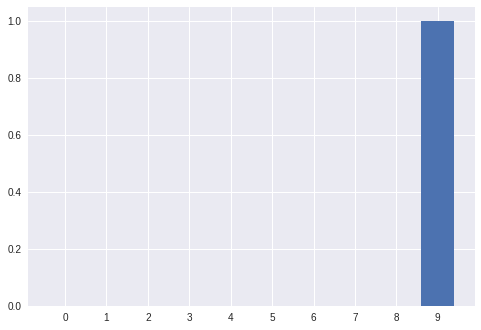

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x_img = x_test[7:8]
# 预测单张图像的概率
prediction = model.predict(x_img)

x_coordinates = np.arange(prediction.shape[1])

plt.bar(x_coordinates, prediction[0][:])
plt.xticks(x_coordinates, np.arange(10))
plt.show()

In [14]:
print("训练集图像大小：{}".format(x_train.shape))
print("训练集标签大小：{}".format(y_train.shape))
print("验证集图像大小：{}".format(x_valid.shape))
print("验证集标签大小：{}".format(y_valid.shape))
print("测试集图像大小：{}".format(x_test.shape))
print("测试集标签大小：{}".format(y_test.shape))

训练集图像大小：(55000, 784)
训练集标签大小：(55000, 10)
验证集图像大小：(5000, 784)
验证集标签大小：(5000, 10)
测试集图像大小：(10000, 784)
测试集标签大小：(10000, 10)


In [15]:
prediction

array([[2.2846578e-18, 3.2651582e-14, 7.6700571e-13, 3.4668282e-08,
        1.7700595e-10, 8.1847035e-10, 1.2719047e-25, 2.0290436e-09,
        2.3254356e-13, 1.0000000e+00]], dtype=float32)